# Welcome to the coolpuppy CLI walkthrough notebook!
Please first see the python API examples for a more detailed introduction.
Here we will reproduce all of the plots from the API notebook, but only using CLI!
Note that, however, the API tutorial saves some files used in the commands here which would be tricky to obtain using CLI tools only.

In [1]:
from IPython.display import Image

## Simple local pileup
First a simple local pileup around all CTCF sites. This command will save the pileup in a hdf5-based file together with all parameters that were used when running it.

In [70]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --basetype bed --local --nshifts 0 \
    --ignore_diags 0 --view hg38_arms.bed --pad 300 \
    --outname local_CTCF_pileup_nonorm.clpy --n_proc 2

Namespace(anchor=None, baselist='test_CTCF.bed.gz', basetype='bed', by_distance=False, by_strand=False, by_window=False, coolfile='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=None, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=0, ooe=True, outname='local_CTCF_pileup_nonorm.clpy', pad=300, post_mortem=False, rescale=False, rescale_pad=1.0, rescale_size=99, seed=None, subset=0, unbalanced=False, view='hg38_arms.bed', weight_name='weight')
chr2_p: 1381
chr17_p: 548
chr2_q: 2221
chr17_q: 1602
Total number of piled up windows: 5752
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/pandas/core/generic.py:2700: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->block0_values] [items->Index(['n'], dtype='object')]

  pytables.to_hdf(
Saved output

This is the plotting command, which in this case simply takes the path to the file we just produced, the output path, and some arguments to control the esthetics of thefigure.

In [73]:
!plotpup.py --output local_CTCF_pileup_nonorm.png \
    --cmap fall --vmax 0.1 --vmin 0.001 \
    --input_pups local_CTCF_pileup_nonorm.clpy

/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pups["norm"][
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


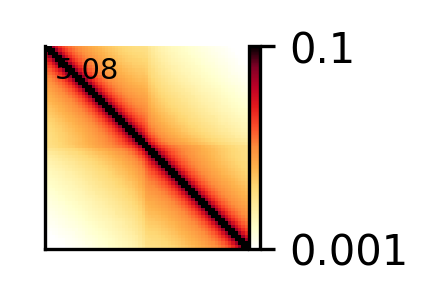

In [74]:
Image('local_CTCF_pileup_nonorm.png')

## Pileups by strand
Now let's split the pileup in two, based on the strands of CTCF sites. There is a simple "preset" for that, you simply need to add `--by_strand` argument.

In [33]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --basetype bed --local --by_strand --nshifts 0 \
    --ignore_diags 0 --view hg38_arms.bed --pad 300 \
    --outname local_CTCF_pileup_bystrand_nonorm.clpy --n_proc 2

Namespace(anchor=None, baselist='test_CTCF.bed.gz', basetype='bed', by_distance=False, by_strand=True, by_window=False, coolfile='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=None, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=0, ooe=True, outname='local_CTCF_pileup_bystrand_nonorm.clpy', pad=300, post_mortem=False, rescale=False, rescale_pad=1.0, rescale_size=99, seed=None, subset=0, unbalanced=False, view='hg38_arms.bed', weight_name='weight')
chr2_p: 1381
chr17_p: 548
chr2_q: 2221
chr17_q: 1602
Total number of piled up windows: strand2
all    5752
Name: n, dtype: object
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/pandas/core/generic.py:2700: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['or

In [34]:
!plotpup.py --cols orientation --output local_CTCF_pileup_bystrand_nonorm.png \
    --cmap fall --vmax 0.1 --vmin 0.001 \
    --input_pups local_CTCF_pileup_bystrand_nonorm.clpy

/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pups["norm"][
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


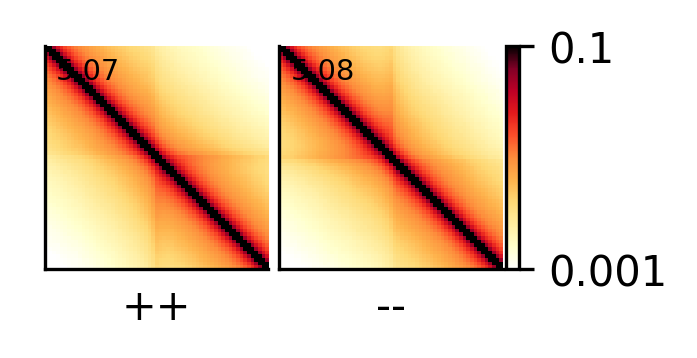

In [35]:
Image('local_CTCF_pileup_bystrand_nonorm.png')

## Normalization to background interaction level
### Random shifts
Now let's repeat the above, but also normalize the pileups to the decay of contact probability with separation. You can either use the randomly shifted control regions (here) or a global expected level of interactions calculated for the whole chromosome arm (see below).

In [36]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --basetype bed --local --by_strand --nshifts 1 \
    --ignore_diags 0 --view hg38_arms.bed --pad 300 \
    --outname local_CTCF_pileup_bystrand_1shift.clpy --n_proc 2

Namespace(anchor=None, baselist='test_CTCF.bed.gz', basetype='bed', by_distance=False, by_strand=True, by_window=False, coolfile='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected=None, ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=1, ooe=True, outname='local_CTCF_pileup_bystrand_1shift.clpy', pad=300, post_mortem=False, rescale=False, rescale_pad=1.0, rescale_size=99, seed=None, subset=0, unbalanced=False, view='hg38_arms.bed', weight_name='weight')
chr2_p: 1381
chr17_p: 548
chr2_q: 2221
chr17_q: 1602
Total number of piled up windows: strand2
all    5752
Name: n, dtype: object
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/pandas/core/generic.py:2700: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['or

In [37]:
!plotpup.py --cols orientation \
    --output local_CTCF_pileup_bystrand_1shift.png \
    --input_pups local_CTCF_pileup_bystrand_1shift.clpy

/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pups["norm"][
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


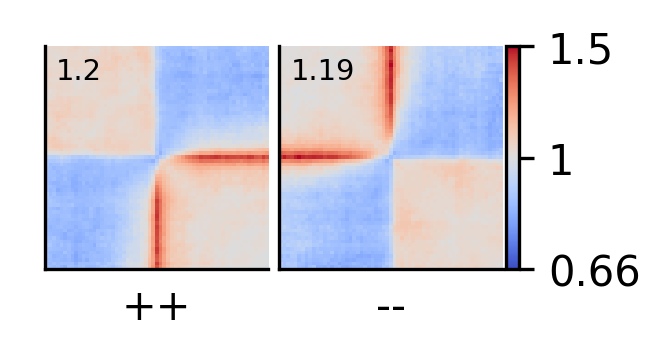

In [38]:
Image('local_CTCF_pileup_bystrand_1shift.png')

### Chromosome arm-wide expected normalization
While we computed the expected using cooltools python API in the API notebook, here is the CLI version of the same process, with 2 cores

In [76]:
!cooltools compute-expected --view hg38_arms.bed -p 2 -o test_expected_cis.tsv test.mcool::resolutions/10000

This is a little faster than using random shifts, and in most cases results are very similar

In [77]:
!coolpup.py test.mcool::resolutions/10000 test_CTCF.bed.gz \
    --basetype bed --local --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --pad 300 \
    --outname local_CTCF_pileup_bystrand_expected.clpy --n_proc 2

Namespace(anchor=None, baselist='test_CTCF.bed.gz', basetype='bed', by_distance=False, by_strand=True, by_window=False, coolfile='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected='test_expected_cis.tsv', ignore_diags=0, incl_chrs='all', local=True, logLevel='INFO', maxdist=None, maxshift=1000000, mindist=None, minshift=100000, n_proc=2, nshifts=10, ooe=True, outname='local_CTCF_pileup_bystrand_expected.clpy', pad=300, post_mortem=False, rescale=False, rescale_pad=1.0, rescale_size=99, seed=None, subset=0, unbalanced=False, view='hg38_arms.bed', weight_name='weight')
With specified expected will not use controls
chr2_p: 1381
chr17_p: 548
chr2_q: 2221
chr17_q: 1602
Total number of piled up windows: strand2
all    5752
Name: n, dtype: object
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/pandas/core/generic.py:2700: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types 

In [78]:
!plotpup.py --cols orientation \
    --output local_CTCF_pileup_bystrand_expected.png \
    --input_pups local_CTCF_pileup_bystrand_expected.clpy

/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pups["norm"][
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


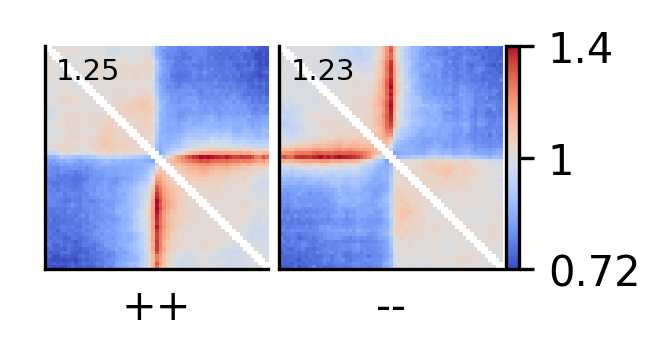

In [79]:
Image('local_CTCF_pileup_bystrand_expected.png')

## By-distance pileups
Now we can add another layer of complexity: look at distal interactions betwwen CTCF sites, and split all snippets by their distance.
We use the file that we saved in the python API notebook that contains the annotation of site strength. `coolpup.py` can accept the coordinate input from stdin, so we can filter that file on the fly using awk, and this way we can use only the strong CTCF sites.

In [53]:
# This command will take a bit to run, since it's averaging over a much larger number of snippets
! cat annotated_ctcf_sites.tsv | awk -F'\t' '($11 == "Top by both scores")' | coolpup.py test.mcool::resolutions/10000 - \
    --basetype bed --by_distance --by_strand --expected test_expected_cis.tsv \
    --ignore_diags 0 --view hg38_arms.bed --pad 300 --mindist 100000 --maxdist 102400000 \ # We know the right top distance from the API examples
    --outname bydistance_CTCF_pileup_bystrand_expected.clpy --n_proc 2

Namespace(anchor=None, baselist='-', basetype='bed', by_distance=True, by_strand=True, by_window=False, coolfile='test.mcool::resolutions/10000', coverage_norm=False, excl_chrs='chrY,chrM', expected='test_expected.tsv', ignore_diags=0, incl_chrs='all', local=False, logLevel='INFO', maxdist=102400000, maxshift=1000000, mindist=100000, minshift=100000, n_proc=2, nshifts=10, ooe=True, outname='bydistance_CTCF_pileup_bystrand_expected.clpy', pad=300, post_mortem=False, rescale=False, rescale_pad=1.0, rescale_size=99, seed=None, subset=0, unbalanced=False, view='hg38_arms.bed', weight_name='weight')
With specified expected will not use controls
chr2_p: 10250
/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:1519: RuntimeWarning: invalid value encountered in true_divide
  data = data / exp_data
chr17_p: 2959
chr2_q: 15938
chr17_q: 28284
/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:1745: PerformanceWarning: indexing past lexsort depth may impact performance.
  n = normalized_roi.loc["a

In [66]:
!plotpup.py --cols separation \ # "separation" is created when the pileups are created by distance, and plotpup.py always plots them in increasing order
    --rows orientation \
    --row_order "-+ -- ++ +-" \ # We need to specify the order of rows, otherise it's not guaranteed
    --vmax 3 \
    --output bydistance_CTCF_pileup_bystrand_expected.png \
    --input_pups bydistance_CTCF_pileup_bystrand_expected.clpy

/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pups["norm"][
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


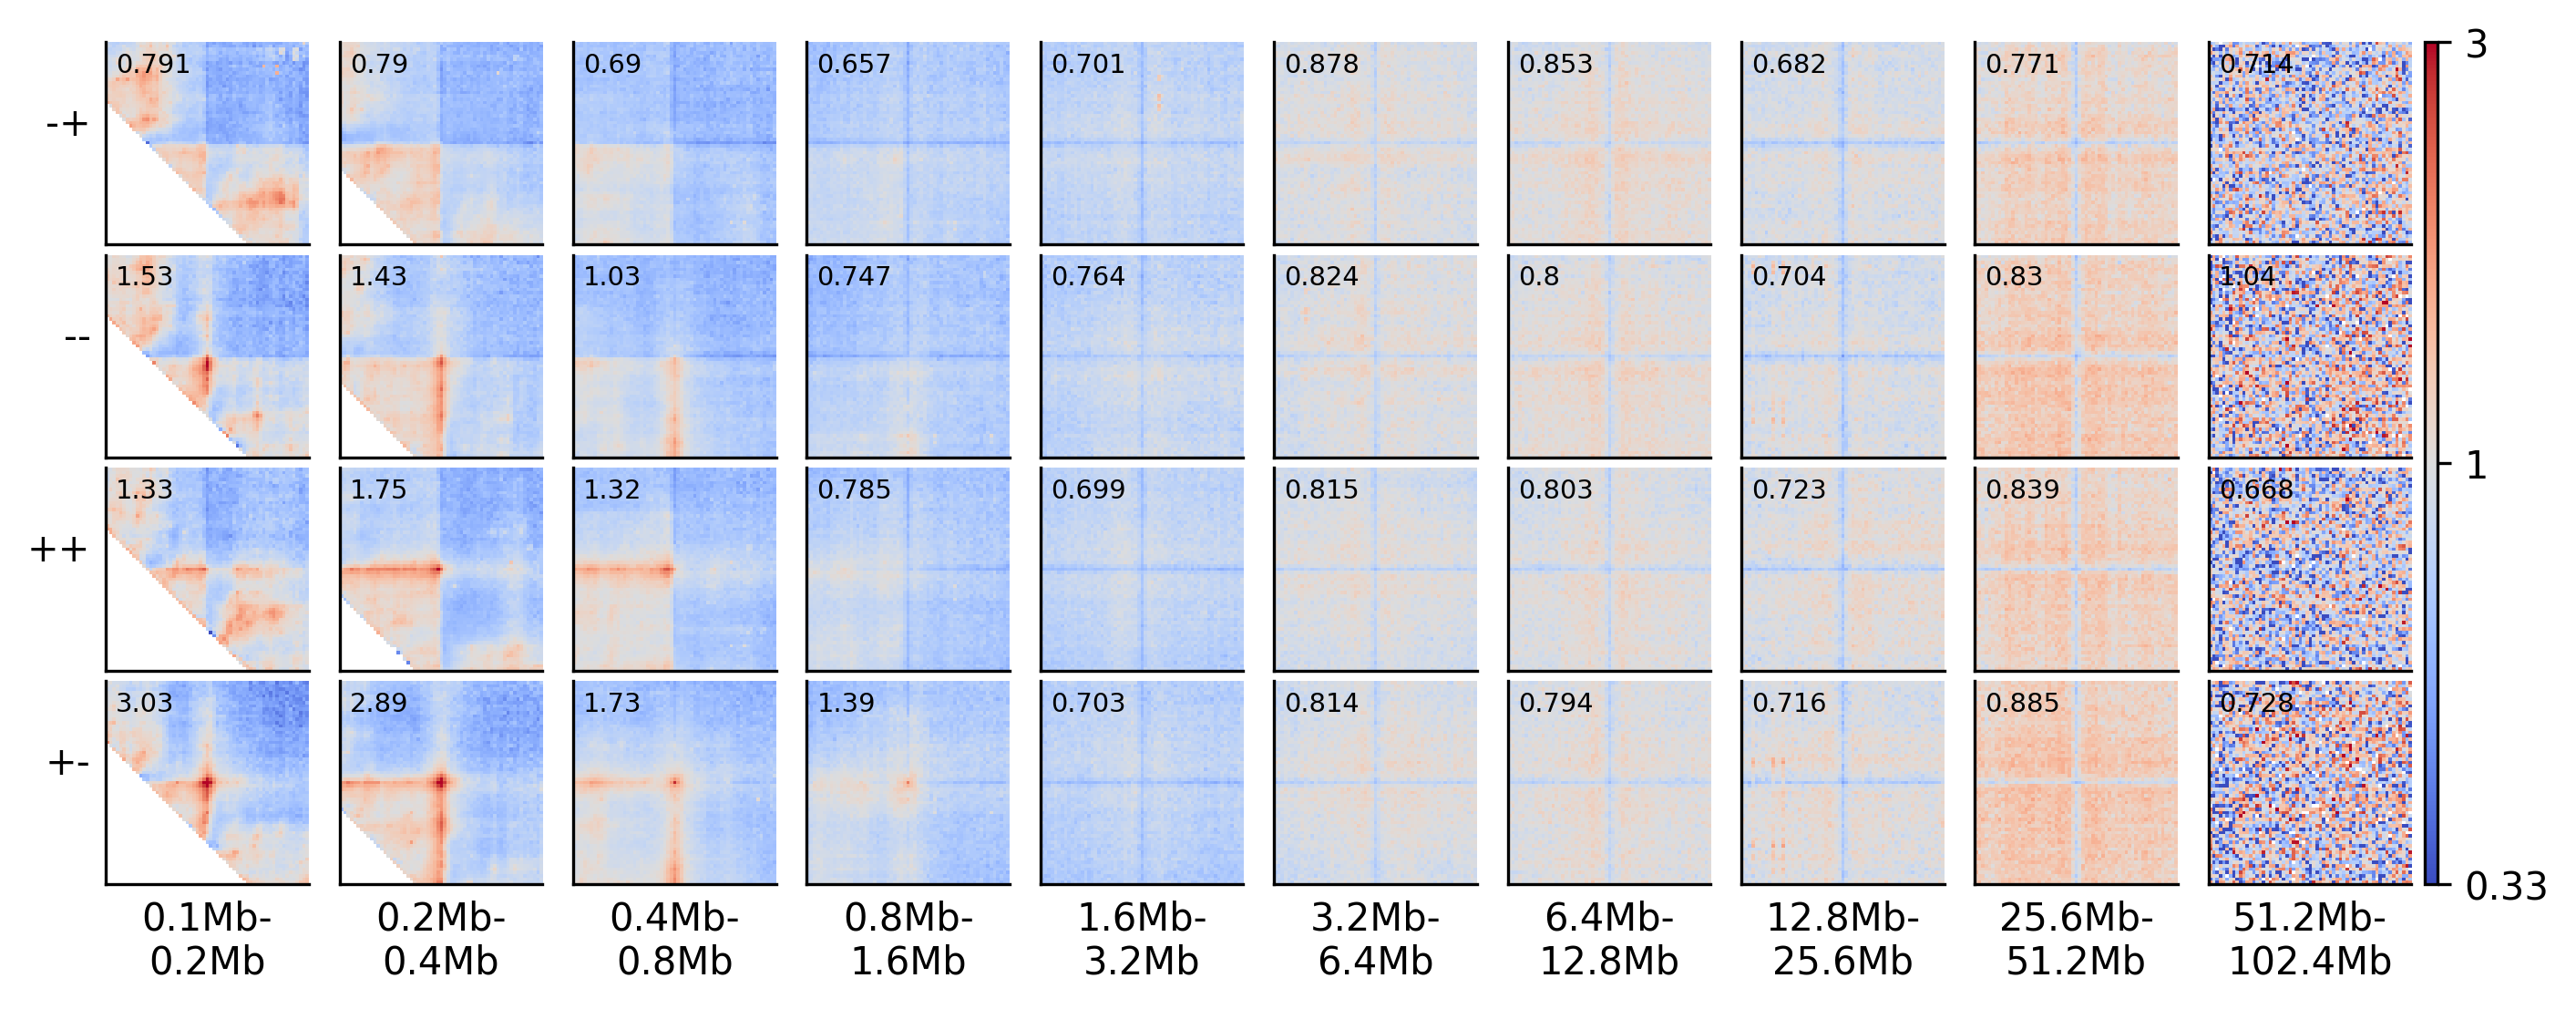

In [67]:
Image('bydistance_CTCF_pileup_bystrand_expected.png')

Now we can also normalize each pileup to the average value in its top-left and bottom-right corners to remove the variation in background level of interactions

In [68]:
!plotpup.py --cols separation --rows orientation --vmax 3 --norm_corners 10 \
    --row_order "-+ -- ++ +-"\
    --output bydistance_CTCF_pileup_bystrand_expected_corner_norm.png \
    --input_pups bydistance_CTCF_pileup_bystrand_expected.clpy

/home/ilya/Projects/coolpuppy/coolpuppy/coolpup.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pups["norm"][
/home/ilya/miniconda/envs/hic3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


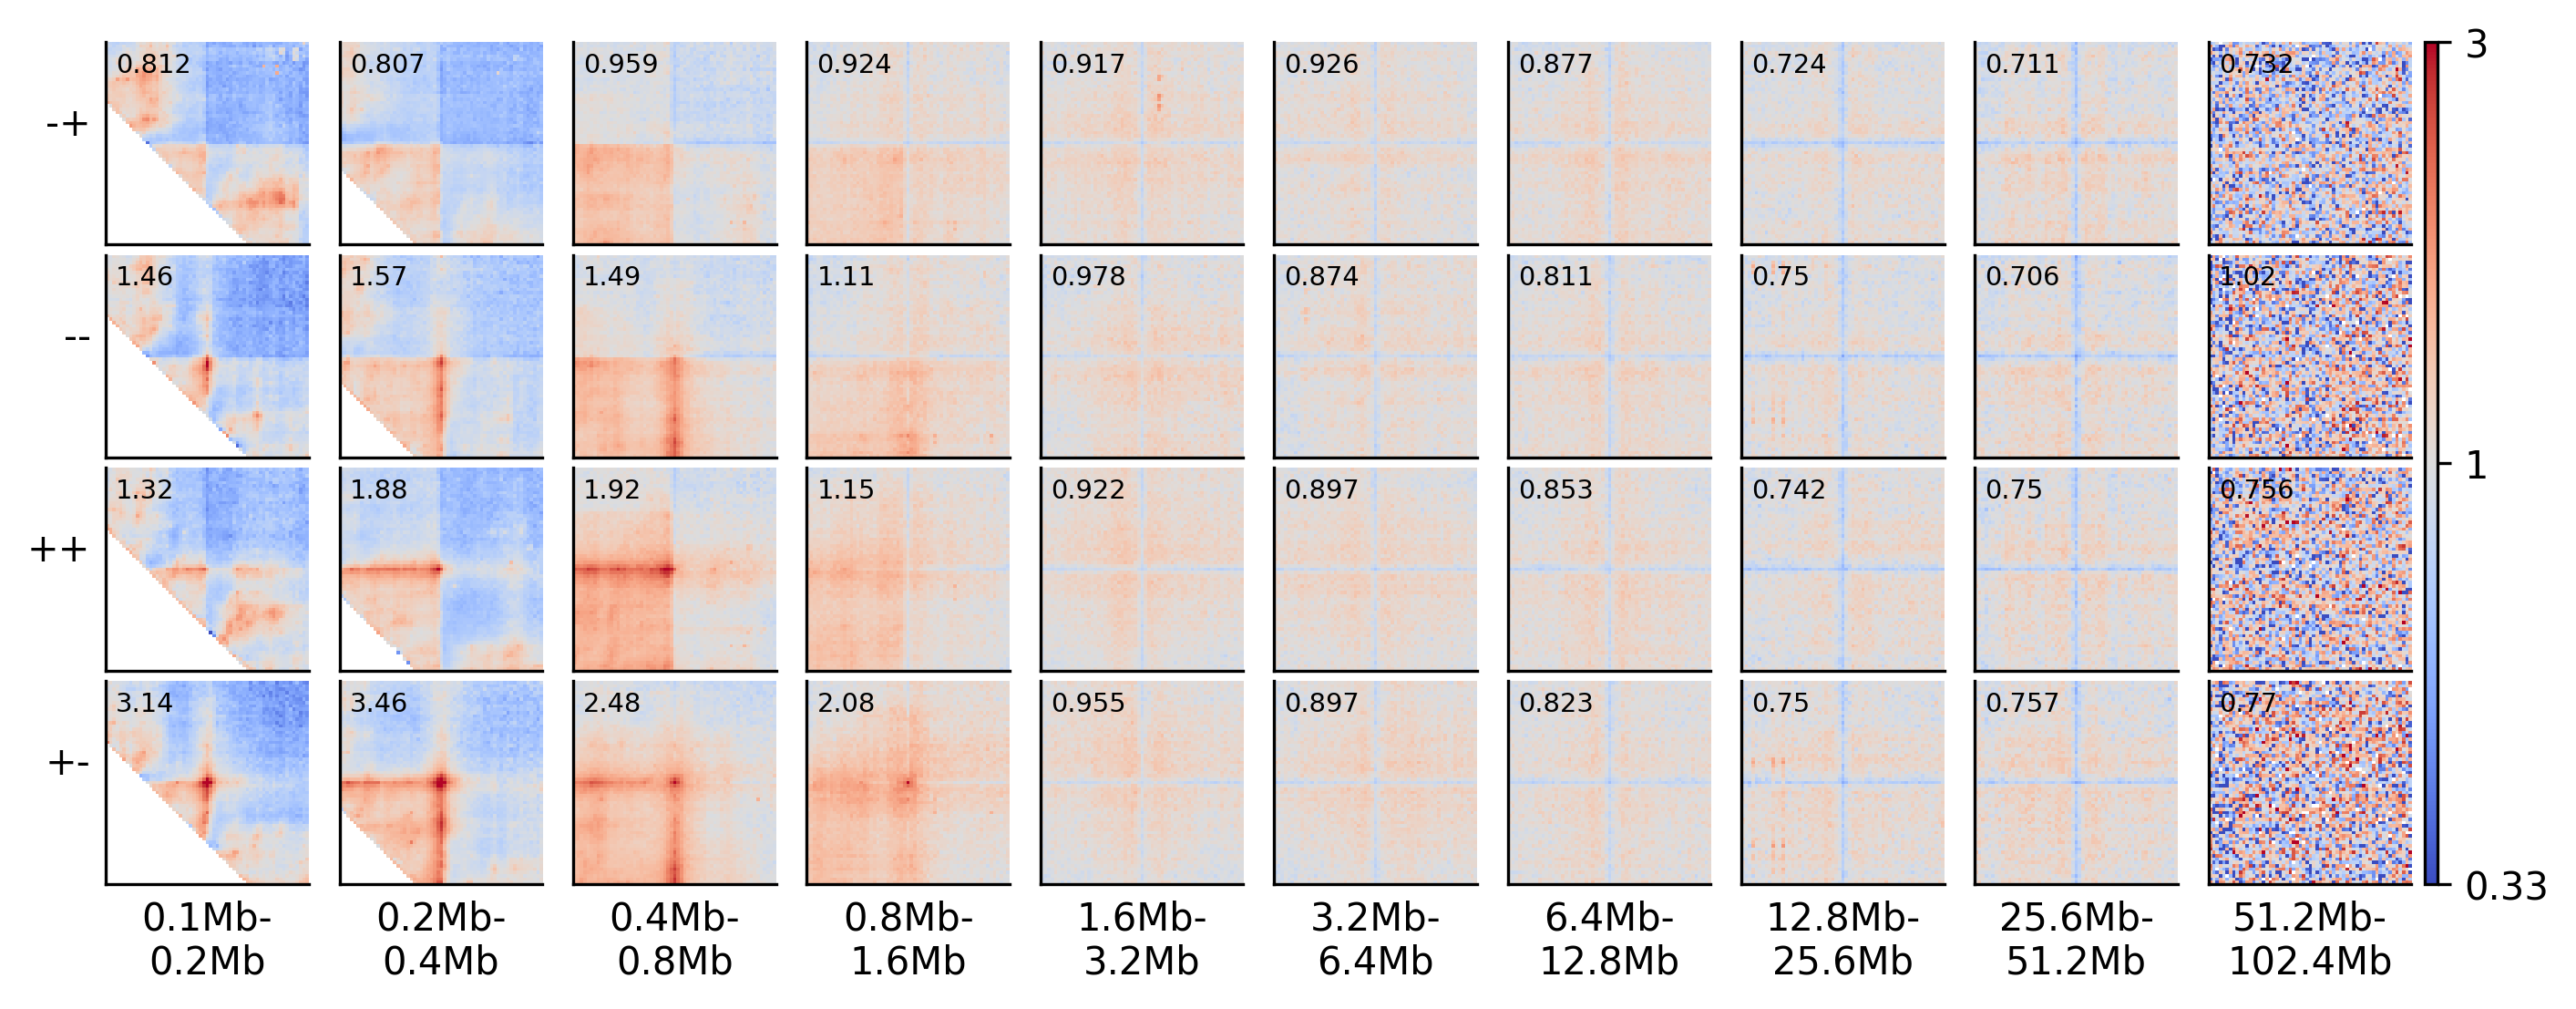

In [69]:
Image('bydistance_CTCF_pileup_bystrand_expected_corner_norm.png')